## Supervised Machine Learning: Regression
### Hate and Crime in USA (1991 - 2018)

### This script contains the following:

1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#defining path

path = '/Users/Ana/Documents/Hate Crimes in the US'

In [4]:
path

'/Users/Ana/Documents/Hate Crimes in the US'

In [5]:
# Import data
df = pd.read_csv(os.path.join(path, 'Prepared dataset', 'hate_crimes_wrangled_2.1.csv'))

/var/folders/s5/l8yzj1zj6cb2wnts0l2khjl40000gq/T/ipykernel_47654/1928922494.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Prepared dataset', 'hate_crimes_wrangled_2.1.csv'))


### 2. Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME',
       'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME',
       'TOTAL_INDIVIDUAL_VICTIMS', 'BIAS_DESC'],
      dtype='object')

In [7]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0'],axis = 1)

In [65]:
df.head(20)

DATA_YEAR STATE_ABBR STATE_NAME REGION_NAME  TOTAL_OFFENDER_COUNT  \
0        1991         AZ    Arizona        West                     0   
1        1991         AZ    Arizona        West                     1   
2        1991         AZ    Arizona        West                     1   
3        1991         AZ    Arizona        West                     1   
4        1991         AZ    Arizona        West                     1   
5        1991         AZ    Arizona        West                     1   
6        1991         AZ    Arizona        West                     1   
7        1991         AZ    Arizona        West                     0   
8        1991         AZ    Arizona        West                     1   
9        1991         AZ    Arizona        West                     1   
10       1991         AZ    Arizona        West                     1   
11       1991         AZ    Arizona        West                     1   
12       1991         AZ    Arizona        West                     1   
13       1991         AZ    Arizona        West                     1   
14       1991         AZ    Arizona        West                     1   
15       1991         AZ    Arizona        West                     0   
16       1991         AZ    Arizona        West                     1   
17       1991         AZ    Arizona        West                     1   
18       1991         AZ    Arizona        West                     1   
19       1991         AZ    Arizona        West                     1   

                OFFENDER_RACE  VICTIM_COUNT  \
0                     Unknown             1   
1                     Unknown             1   
2                     Unknown             1   
3                       White             1   
4                     Unknown             1   
5                       White             1   
6                       White             1   
7                     Unknown             1   
8                       White             1   
9                     Unknown             1   
10                      White             1   
11                      White             1   
12                      White             3   
13                      White             1   
14                      White             1   
15                    Unknown             1   
16                      White             3   
17                      White             2   
18                      White             1   
19  Black or African American             1   

                                         OFFENSE_NAME  \
0                                        Intimidation   
1                                        Intimidation   
2                                        Intimidation   
3                                  Aggravated Assault   
4                                        Intimidation   
5                                      Simple Assault   
6                                        Intimidation   
7            Destruction/Damage/Vandalism of Property   
8                                        Intimidation   
9                                        Intimidation   
10                                       Intimidation   
11                                       Intimidation   
12                                 Aggravated Assault   
13                                 Aggravated Assault   
14                                       Intimidation   
15           Destruction/Damage/Vandalism of Property   
16  Destruction/Damage/Vandalism of Property;Intim...   
17                                     Simple Assault   
18                                 Aggravated Assault   
19                                     Simple Assault   

   TOTAL_INDIVIDUAL_VICTIMS                       BIAS_DESC  
0                       1.0  Anti-Black or African American  
1                       1.0                     Anti-Jewish  
2                       1.0                       Anti-Arab  
3                       1.0  Anti-Bl

In [9]:
TOTAL_INDIVIDUAL_VICTIMS = [1.0, 2.0, 3.0] 
  
# values are split at decimal point 
lst = [] 
for each in TOTAL_INDIVIDUAL_VICTIMS : 
    lst.append(str(each).split('.')[0]) 
  
# all values converting to integer data type 
final_list = [int(i) for i in lst] 
print(final_list) 

[1, 2, 3]


In [10]:
df.head(20)

DATA_YEAR STATE_ABBR STATE_NAME REGION_NAME  TOTAL_OFFENDER_COUNT  \
0        1991         AZ    Arizona        West                     0   
1        1991         AZ    Arizona        West                     1   
2        1991         AZ    Arizona        West                     1   
3        1991         AZ    Arizona        West                     1   
4        1991         AZ    Arizona        West                     1   
5        1991         AZ    Arizona        West                     1   
6        1991         AZ    Arizona        West                     1   
7        1991         AZ    Arizona        West                     0   
8        1991         AZ    Arizona        West                     1   
9        1991         AZ    Arizona        West                     1   
10       1991         AZ    Arizona        West                     1   
11       1991         AZ    Arizona        West                     1   
12       1991         AZ    Arizona        West                     1   
13       1991         AZ    Arizona        West                     1   
14       1991         AZ    Arizona        West                     1   
15       1991         AZ    Arizona        West                     0   
16       1991         AZ    Arizona        West                     1   
17       1991         AZ    Arizona        West                     1   
18       1991         AZ    Arizona        West                     1   
19       1991         AZ    Arizona        West                     1   

                OFFENDER_RACE  VICTIM_COUNT  \
0                     Unknown             1   
1                     Unknown             1   
2                     Unknown             1   
3                       White             1   
4                     Unknown             1   
5                       White             1   
6                       White             1   
7                     Unknown             1   
8                       White             1   
9                     Unknown             1   
10                      White             1   
11                      White             1   
12                      White             3   
13                      White             1   
14                      White             1   
15                    Unknown             1   
16                      White             3   
17                      White             2   
18                      White             1   
19  Black or African American             1   

                                         OFFENSE_NAME  \
0                                        Intimidation   
1                                        Intimidation   
2                                        Intimidation   
3                                  Aggravated Assault   
4                                        Intimidation   
5                                      Simple Assault   
6                                        Intimidation   
7            Destruction/Damage/Vandalism of Property   
8                                        Intimidation   
9                                        Intimidation   
10                                       Intimidation   
11                                       Intimidation   
12                                 Aggravated Assault   
13                                 Aggravated Assault   
14                                       Intimidation   
15           Destruction/Damage/Vandalism of Property   
16  Destruction/Damage/Vandalism of Property;Intim...   
17                                     Simple Assault   
18                                 Aggravated Assault   
19                                     Simple Assault   

   TOTAL_INDIVIDUAL_VICTIMS                       BIAS_DESC  
0                         1  Anti-Black or African American  
1                         1                     Anti-Jewish  
2                         1                       Anti-Arab  
3                         1  Anti-Bl

In [66]:
df.shape

(153656, 10)

In [18]:
# Renaming columns 
df.rename(columns = {'DATA_YEAR':'incident_year',
             'STATE_ABBR':'state_abbr',
             'STATE_NAME':'state_name',
             'REGION_NAME':'region_name',
             'TOTAL_OFFENDER_COUNT':'offender_count',
             'OFFENDER_RACE':'offender_race',
             'VICTIM_COUNT':'victim_count',
             'OFFENSE_NAME':'offense_type',
             'TOTAL_INDIVIDUAL_VICTIMS':'total_individual_victims',
             'BIAS_DESC':'prejudice'}, inplace = True)

In [19]:
df.columns

Index(['incident_year', 'state_abbr', 'state_name', 'region_name',
       'offender_count', 'offender_race', 'victim_count', 'offense_type',
       'total_individual_victims', 'prejudice'],
      dtype='object')

/var/folders/s5/l8yzj1zj6cb2wnts0l2khjl40000gq/T/ipykernel_47654/4040426630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_individual_victims'],bins = 25, kde = True)


<Axes: xlabel='total_individual_victims', ylabel='Density'>

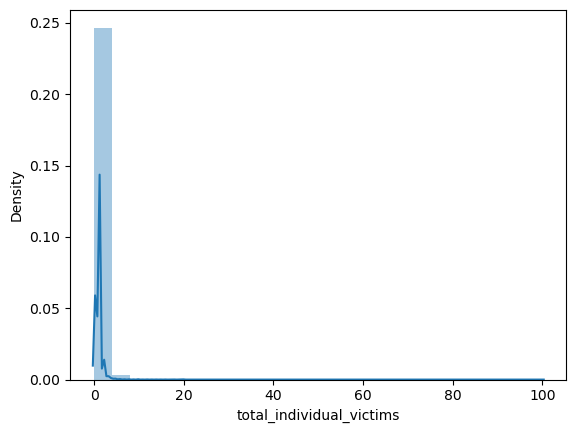

In [41]:
# Check for extreme values
sns.distplot(df['total_individual_victims'],bins = 25, kde = True)

In [42]:
#Check for mean 
df['total_individual_victims'].mean()

0.9775715898055067

In [43]:
#Check for median 
df['total_individual_victims'].median()

1.0

In [44]:
#Check for min 
df['total_individual_victims'].min()

0.0

In [45]:
#Check for max 
df['total_individual_victims'].max()

100.0

In [37]:
# Convert errors to NaN, which can then be handled
df['total_individual_victims'] = pd.to_numeric(df['total_individual_victims'], errors='coerce')

In [38]:
# Check how many NaN values were introduced (these correspond to non-numeric entries)
print(df['total_individual_victims'].isna().sum())

1260


In [39]:
# Replace with mean (excluding NaN in the calculation)
mean_value = df['total_individual_victims'].mean()
df['total_individual_victims'].fillna(mean_value, inplace=True)

In [40]:
# Check how many NaN values were introduced (these correspond to non-numeric entries)
print(df['total_individual_victims'].isna().sum())

0


In [46]:
df.describe()

incident_year  offender_count   victim_count  total_individual_victims
count  153656.000000   153656.000000  153656.000000             153656.000000
mean     2004.031271        0.931698       1.240212                  0.977572
std         7.685466        1.277603       1.021476                  1.034152
min      1991.000000        0.000000       1.000000                  0.000000
25%      1998.000000        0.000000       1.000000                  1.000000
50%      2004.000000        1.000000       1.000000                  1.000000
75%      2010.000000        1.000000       1.000000                  1.000000
max      2018.000000       99.000000     100.000000                100.000000

### 3. Data Prep for Regression Analysis

#### Hypotheses

If the total individual victims count increases, then the victim count increases

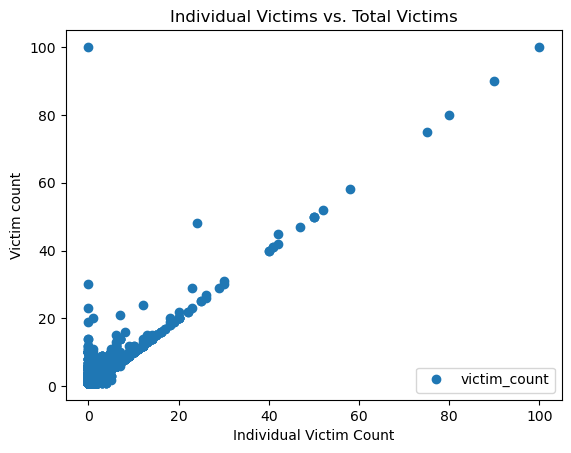

In [47]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'total_individual_victims', y='victim_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Individual Victims vs. Total Victims')  
plt.xlabel('Individual Victim Count')  
plt.ylabel('Victim count')  
plt.show()

In [48]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['total_individual_victims'].values.reshape(-1,1)
y = df['victim_count'].values.reshape(-1,1)

In [49]:
X

array([[1.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [1.]])

In [50]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [51]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [52]:
# Create regression object
regression = LinearRegression()

In [53]:
LinearRegression()

LinearRegression()

In [54]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

In [56]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Individual Victims vs. Total Victims (Test set)')
plot_test.xlabel('Individual Victim Count')
plot_test.ylabel('Victim Count')
plot_test.show()

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [58]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.80473641]]
Mean squared error:  0.2445360288083017
R2 score:  0.7790282204336135


#### Interpretation

1. SLOPE:  We have a Positive slope of 80.5%, this means y-values are growing compared to the x-values. 
2. Lower the MSE, is a good sign since the closer is forecast to actual, in this case 0.25 
3. The model predicts 78% of the relationship between the dependent and independent variables.

In [59]:
# Predict on the training set
# This is predicting X_train!
y_predicted_train = regression.predict(X_train) 

In [60]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [61]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.80473641]]
Mean squared error:  0.3687803747598568
R2 score:  0.6371295021298187


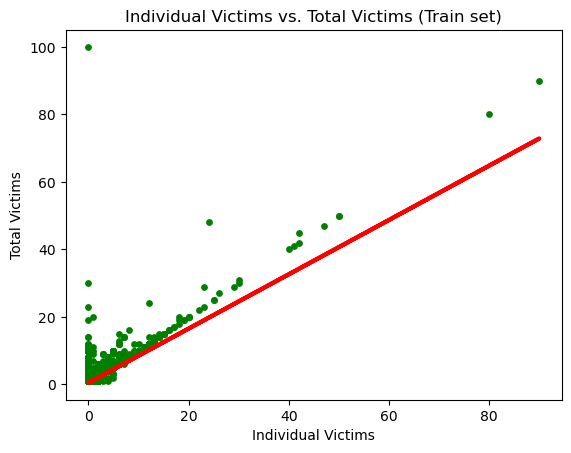

In [62]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Individual Victims vs. Total Victims (Train set)')
plot_test.xlabel('Individual Victims')
plot_test.ylabel('Total Victims')
plot_test.show()

In [63]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0        1   1.260281
1        1   1.260281
2        1   0.455545
3        1   1.260281
4        1   1.260281
5        1   1.260281
6        2   2.065018
7        1   1.260281
8        1   1.260281
9        1   1.260281
10       1   1.260281
11       2   1.260281
12       2   2.065018
13       1   1.260281
14       1   1.260281
15       2   0.455545
16       1   1.260281
17       1   0.455545
18       1   1.260281
19       1   0.455545
20       1   0.455545
21       1   1.260281
22       5   0.455545
23       1   1.260281
24       1   1.260281
25       1   1.260281
26       2   2.065018
27       1   1.260281
28       1   0.455545
29       1   0.455545

#### Interpretation 02

In this case the models outcome on the training set is very similar to that on the test set. Same slope, but slightly higher MSE and R2 score.

In [64]:
# exporting data 
df.to_csv(os.path.join(path, 'Prepared dataset', 'hate_crimes_wrangled_3.csv'))